In [1]:
import skimage
import tifffile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from scipy.optimize import curve_fit
from matplotlib import rcParams
from statsmodels.stats.weightstats import ttest_ind
from statannotations.Annotator import Annotator
from math import floor
rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

/tmp/ipykernel_121271/2984105621.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['well_position', 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()


Text(0, 0.5, 'GCase intensity')

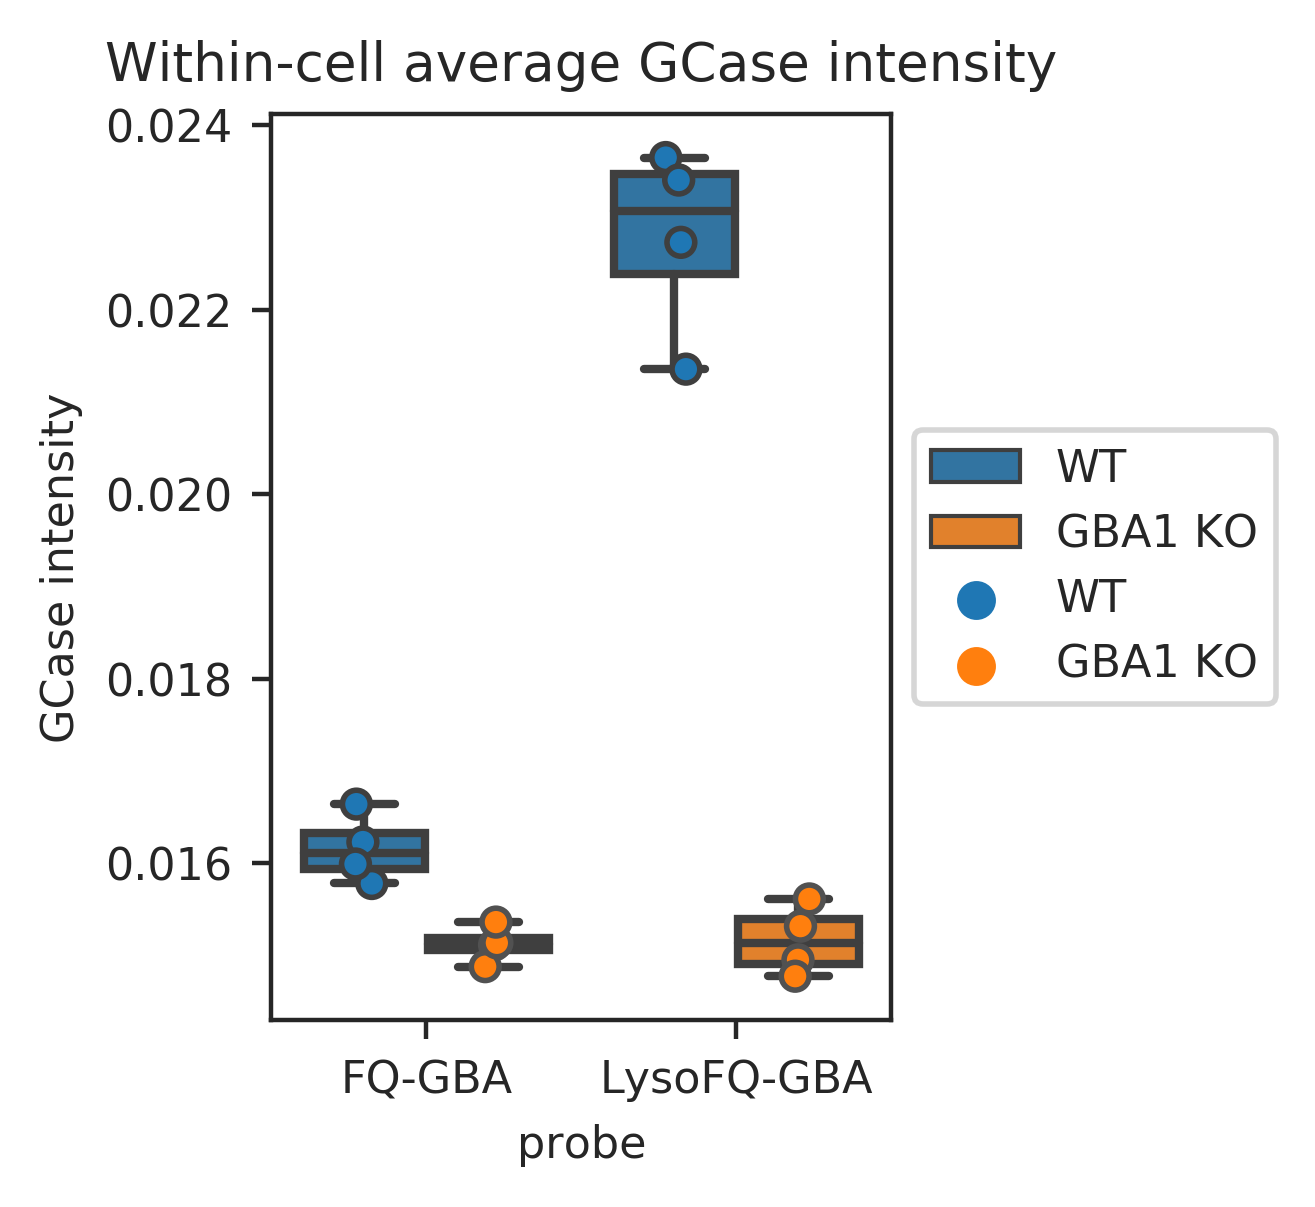

In [106]:
rcParams['figure.dpi'] = 400
plt.rcParams['figure.figsize'] = (2, 3)
plt.rcParams['font.size'] = 8
data_dir = Path('/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
# data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/')
platemap = pd.read_csv(data_dir / 'platemap.csv')
data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
filename = 'FileName_DAPI'
# data = pd.read_csv(data_dir / '2023-04-11_GBA_analysis' / '2023-04-11_GBA_analysis_Image.csv')
# filename = 'FileName_DAPI_pre_illum'

cellpose_data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
data['Count_nuclei'] = cellpose_data['Count_cytoplasm_outlines']

# Set filename and well position
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
data = data.drop(data.index[data['Count_nuclei'] < 6])
data = data.merge(platemap, on='well_position')
data = data.groupby(['well_position', 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
# data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Count_nuclei',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_LysoTracker'
]
measurements = [
    'Count_cytoplasm_outlines',
    'Mean_cytoplasm_outlines_Intensity_MeanIntensity_DAPI_corrected',
    'Mean_cytoplasm_outlines_Intensity_MeanIntensity_GCase_corrected',
    'Mean_cytoplasm_outlines_Intensity_MeanIntensity_LysoTracker_corrected'
]

m = measurements[2]
sns.set_style('ticks')

data = data.query('concentration==0')
x = 'probe'
y = m
hue = 'crispr'
# data[m] = data[m] / data['Count_nuclei']
sns.boxplot(data=data, x=x, y=y, hue=hue, showfliers=False)
sns.stripplot(data=data, x=x, y=y, hue=hue, dodge=True, linewidth=1, size=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


    # axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    # axs[axs_row, axs_col].set_ylabel(m.split('_')[0] + ' ' + m.split('_')[-2])
    # axs[axs_row, axs_col].xaxis.grid(True)
    # axs[axs_row, axs_col].legend('')

# plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
# plt.subplots_adjust(wspace=0.02, hspace=0.1)
plt.title('Whole image ÷ cell number GCase intensity')
plt.title('Within-cell average GCase intensity')
plt.ylabel('GCase intensity')

/tmp/ipykernel_2374/384553047.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['well_position', 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()


Text(0.5, 1.0, 'LysoFQ-GBA')

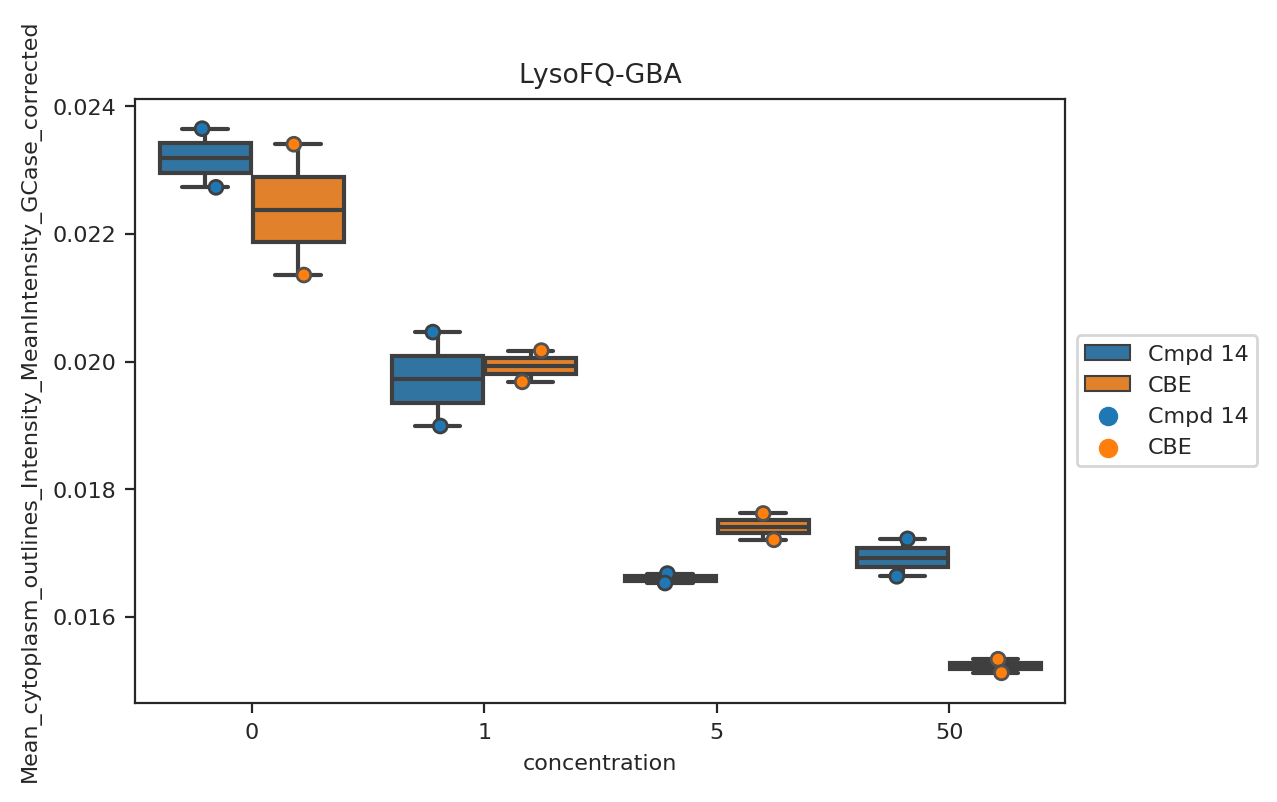

In [21]:
rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 8
data_dir = Path('/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
# data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/')
platemap = pd.read_csv(data_dir / 'platemap.csv')
data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
filename = 'FileName_DAPI'
# data = pd.read_csv(data_dir / '2023-04-11_GBA_analysis' / '2023-04-11_GBA_analysis_Image.csv')
# filename = 'FileName_DAPI_pre_illum'

cellpose_data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
data['Count_nuclei'] = cellpose_data['Count_cytoplasm_outlines']

# Set filename and well position
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
data = data.drop(data.index[data['Count_nuclei'] < 6])
data = data.merge(platemap, on='well_position')
data = data.groupby(['well_position', 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
# data = data.groupby([filename, 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Count_nuclei',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_LysoTracker'
]
measurements = [
    'Count_cytoplasm_outlines',
    'Mean_cytoplasm_outlines_Intensity_MeanIntensity_DAPI_corrected',
    'Mean_cytoplasm_outlines_Intensity_MeanIntensity_GCase_corrected',
    'Mean_cytoplasm_outlines_Intensity_MeanIntensity_LysoTracker_corrected'
]

m = measurements[2]
sns.set_style('ticks')

probe = 'LysoFQ-GBA'
# probe = 'FQ-GBA'
data = data.query('crispr=="WT" and probe==@probe')
# data = data.query('crispr=="GBA1 KO" and probe==@probe')
x = 'concentration'
y = m
hue = 'treatment'
# data[m] = data[m] / data['Count_nuclei']
sns.boxplot(data=data, x=x, y=y, hue=hue, showfliers=False)
sns.stripplot(data=data, x=x, y=y, hue=hue, dodge=True, linewidth=1, size=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


    # axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    # axs[axs_row, axs_col].set_ylabel(m.split('_')[0] + ' ' + m.split('_')[-2])
    # axs[axs_row, axs_col].xaxis.grid(True)
    # axs[axs_row, axs_col].legend('')

# plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
# plt.subplots_adjust(wspace=0.02, hspace=0.1)
plt.ylabel('GCase Intensity')
plt.ylabel(m)
plt.title(probe)

/tmp/ipykernel_427303/2453189550.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['well_position', 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/home/ubuntu/miniconda3/envs/cell-imaging-2/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inpl

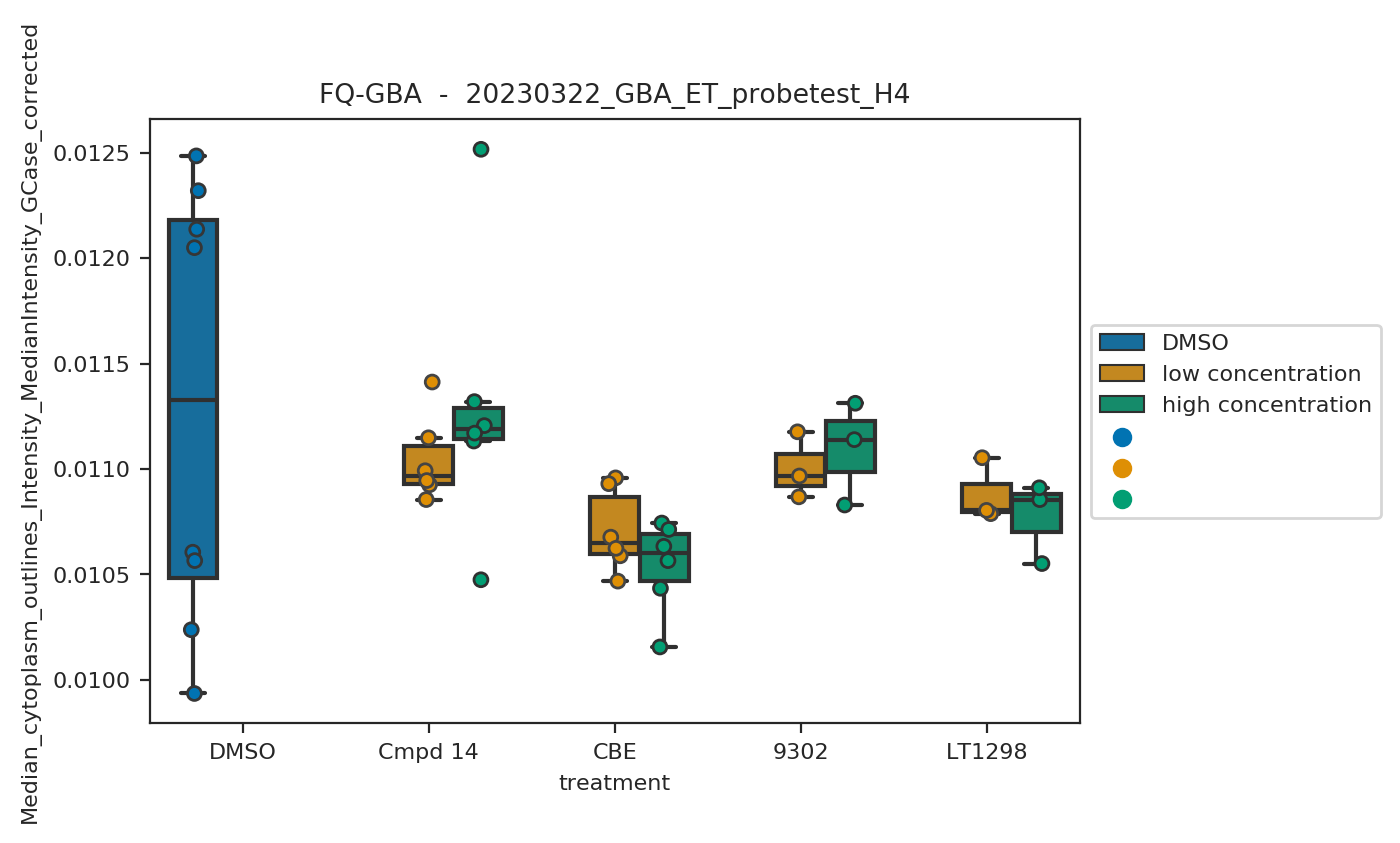

In [37]:
rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 8
# data_dir = Path('/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
# data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/')
data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4_v2/stack 5 FOVs__2023-03-22T13_41_38-Measurement 1/')
platemap = pd.read_csv(data_dir / 'platemap.csv')
platemap.loc[12:83, 'concentration'] = [2, 1] * 36
data = pd.read_csv(data_dir / '2023-04-13_GBA_analysis' / '2023-04-13_GBA_analysis_Image.csv')
filename = 'FileName_DAPI'
# data = pd.read_csv(data_dir / '2023-04-11_GBA_analysis' / '2023-04-11_GBA_analysis_Image.csv')
# filename = 'FileName_DAPI_pre_illum'

data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/')
data = pd.concat([data, pd.read_csv(data_dir / '2023-04-13_GBA_analysis' / '2023-04-13_GBA_analysis_Image.csv')], axis=0)

# cellpose_data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
data['Count_nuclei'] = data['Count_cytoplasm_outlines']

# Set filename and well position
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
data = data.drop(data.index[data['Count_nuclei'] < 6])
data = data.merge(platemap, on='well_position')
data = data.groupby(['well_position', 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
# data = data.groupby([filename, 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Count_nuclei',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_LysoTracker'
]
measurements = [
    'Count_cytoplasm_outlines',
    'Median_cytoplasm_outlines_Intensity_MeanIntensity_DAPI_corrected',
    'Median_cytoplasm_outlines_Intensity_MedianIntensity_GCase_corrected',
    'Median_cytoplasm_outlines_Intensity_MeanIntensity_LysoTracker_corrected'
]

m = measurements[2]
sns.set_style('ticks')

# probe = 'LysoFQ-GBA'
probe = 'FQ-GBA'
# data = data.query('crispr=="WT" and probe==@probe and treatment!="DMSO"')
data = data.query('crispr=="WT" and probe==@probe')
# data = data.query('crispr=="GBA1 KO" and probe==@probe')
# data = data.query('well_position not in ["A02", "A04", "A03", "A05", "A09", "A11", "H02", "H04", "H03", "H05", "H09", "H11"]')
data = data.query('well_position not in ["A03", "A05", "A09", "A11", "H03", "H05", "H09", "H11"]')
hue = 'concentration'
y = m
x = 'treatment'
# data[m] = data[m] / data['Count_nuclei']
sns.boxplot(data=data, x=x, y=y, hue=hue, showfliers=False, palette='colorblind')
sns.stripplot(data=data, x=x, y=y, hue=hue, dodge=True, linewidth=1, size=5, palette='colorblind')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


    # axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    # axs[axs_row, axs_col].set_ylabel(m.split('_')[0] + ' ' + m.split('_')[-2])
    # axs[axs_row, axs_col].xaxis.grid(True)
    # axs[axs_row, axs_col].legend('')

# plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
# plt.subplots_adjust(wspace=0.02, hspace=0.1)
plt.ylabel('GCase Intensity')
plt.ylabel(m)
plt.title(probe + '  -  ' + data_dir.parents[0].name)
legend_label = ['DMSO', 'low concentration', 'high concentration', '', '', '']
for i, l in enumerate(legend_label):
    plt.gca().legend_.texts[i].set_text(l)

In [22]:
data.query('well_position=="A02"')

,well_position,row,col,crispr,probe,treatment,concentration,Channel_DAPI,Channel_GCase,Channel_LysoTracker,...,StDev_cytoplasm_outlines_pre_filt_AreaShape_SpatialMoment_2_2,StDev_cytoplasm_outlines_pre_filt_AreaShape_SpatialMoment_2_3,StDev_cytoplasm_outlines_pre_filt_Children_cytoplasm_outlines_Count,StDev_cytoplasm_outlines_pre_filt_Location_Center_X,StDev_cytoplasm_outlines_pre_filt_Location_Center_Y,StDev_cytoplasm_outlines_pre_filt_Location_Center_Z,Width_DAPI,Width_GCase,Width_LysoTracker,Count_nuclei
1,A02,1,2,WT,LysoFQ-GBA,DMSO,0,-1.0,-1.0,-1.0,...,2.480739e+08,9.618755e+09,0.330111,317.885475,317.667157,0.0,1080.0,1080.0,1080.0,325.066667


In [4]:
plt.rcParams['font.size'] = 8
# data_dir = Path('/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/')
platemap = pd.read_csv(data_dir / 'platemap.csv')
# data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
# filename = 'FileName_DAPI'
data = pd.read_csv(data_dir / '2023-04-11_GBA_analysis' / '2023-04-11_GBA_analysis_Image.csv')
filename = 'FileName_DAPI_pre_illum'

# cellpose_data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
# data['Count_nuclei'] = cellpose_data['Count_cytoplasm_outlines']

# Set filename and well position
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
# data = data.drop(data.index[data['Count_nuclei'] < 6])
data = data.merge(platemap, on='well_position')
# data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()
data = data.groupby(['FileName_DAPI_pre_illum', 'crispr', 'treatment', 'concentration', 'well_position']).mean()
data = data.reset_index()

/tmp/ipykernel_427303/2863363684.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['FileName_DAPI_pre_illum', 'crispr', 'treatment', 'concentration', 'well_position']).mean()


In [61]:
data.query('well_position=="A03"')[m]
# pd.DataFrame(plate*1000)

20    0.006673
21    0.006878
22    0.006773
23    0.006659
24    0.006690
25    0.006769
26    0.006583
27    0.006559
28    0.006649
29    0.006546
Name: Intensity_MeanIntensity_GCase, dtype: float64

/tmp/ipykernel_2374/1432716693.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()


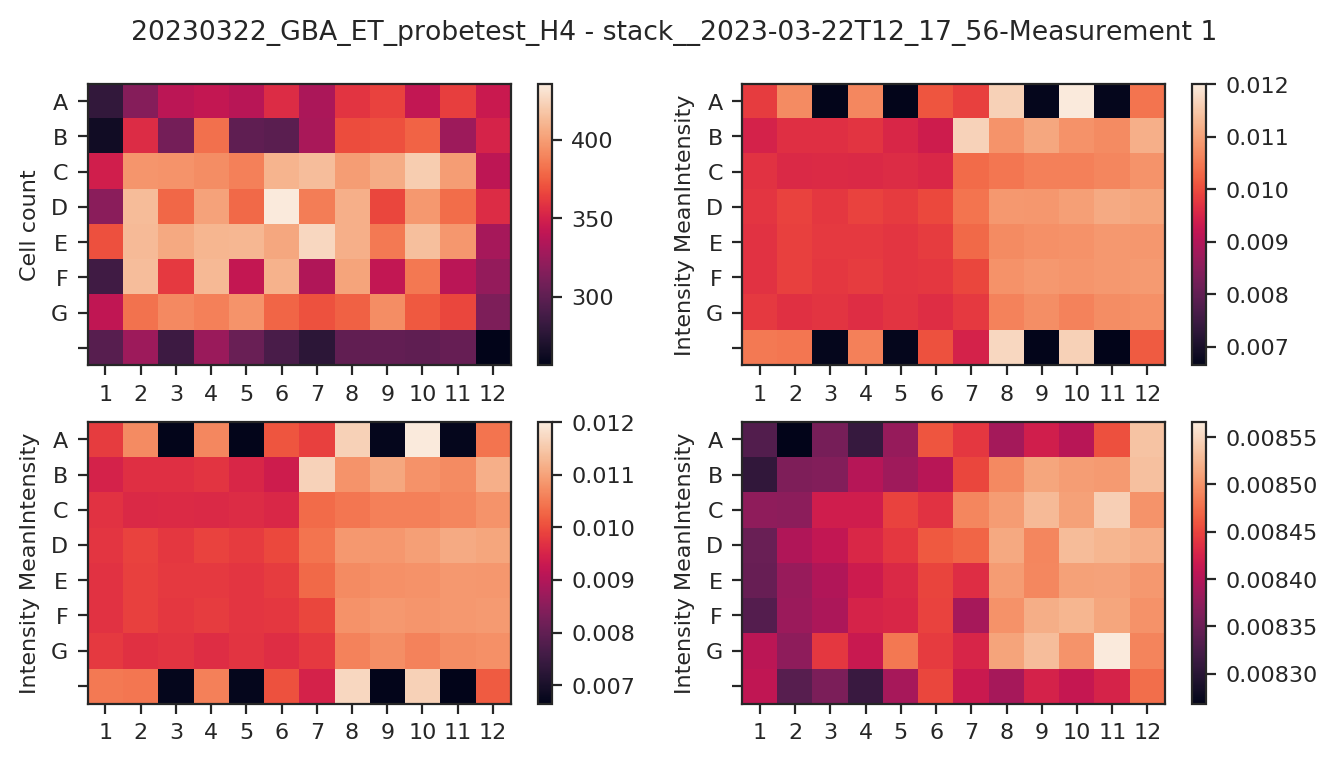

In [98]:
plt.rcParams['font.size'] = 8
# data_dir = Path('/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/')
# data_dir = Path('/lab/processed-data/20230322_GBA_ET_probetest_H4_v2/stack 5 FOVs__2023-03-22T13_41_38-Measurement 1/')
platemap = pd.read_csv(data_dir / 'platemap.csv')
# data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
# filename = 'FileName_DAPI'
# data = pd.read_csv(data_dir / '2023-04-13_GBA_analysis' / '2023-04-13_GBA_analysis_Image.csv')
# filename = 'FileName_DAPI'
data = pd.read_csv(data_dir / '2023-04-11_GBA_analysis' / '2023-04-11_GBA_analysis_Image.csv')
filename = 'FileName_DAPI_pre_illum'

# cellpose_data = pd.read_csv(data_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
# data['Count_nuclei'] = cellpose_data['Count_cytoplasm_outlines']

# Set filename and well position
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
# data = data.drop(data.index[data['Count_nuclei'] < 6])
data = data.merge(platemap, on='well_position')
data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()
# data = data.groupby([filename, 'row', 'col', 'crispr', 'probe', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Count_nuclei',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_GCase',
    'Intensity_MeanIntensity_LysoTracker'
]
# measurements = [
#     'Count_cytoplasm_outlines',
#     'Mean_cytoplasm_outlines_Intensity_MeanIntensity_DAPI_corrected',
#     'Mean_cytoplasm_outlines_Intensity_MeanIntensity_GCase_corrected',
#     'Mean_cytoplasm_outlines_Intensity_MeanIntensity_LysoTracker_corrected'
# ]

sns.set_style('ticks')
fig, axs = plt.subplots(2,2)

for i_m, m in enumerate(measurements):

    axs_row = floor(i_m/2)
    axs_col = i_m % 2

    # data[m] = data[m] / data['Count_nuclei']
    plate[data['row']-1, data['col']-1] = data[m]
    # vmin = plate[plate != plate.min()].min()
    # im = axs[axs_row, axs_col].imshow(plate, vmin=vmin)
    im = axs[axs_row, axs_col].imshow(plate)
    axs[axs_row, axs_col].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
    axs[axs_row, axs_col].set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12])
    axs[axs_row, axs_col].set_yticks([0,1,2,3,4,5,6,7])
    axs[axs_row, axs_col].set_yticklabels(['A','B','C','D','E','F','G'])
    plt.colorbar(im, ax=axs[axs_row, axs_col])
    # plt.title(data_dir.parents[0].name + ' - ' + data_dir.name)

    # axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    axs[axs_row, axs_col].set_ylabel(m.split('_')[0] + ' ' + m.split('_')[-2])
    # axs[axs_row, axs_col].xaxis.grid(True)
    # axs[axs_row, axs_col].legend('')

axs[0, 0].set_ylabel('Cell count')
plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
plt.subplots_adjust(wspace=0.2, hspace=0.2, left=0, right=1, top=0.9)

In [8]:
data.columns.tolist()

['well_position',
 'row',
 'col',
 'crispr',
 'Channel_DAPI',
 'Channel_GCase',
 'Channel_LysoTracker',
 'Count_cytoplasm_outlines',
 'Count_cytoplasm_outlines_pre_filt',
 'ExecutionTime_01Images',
 'ExecutionTime_02Metadata',
 'ExecutionTime_03NamesAndTypes',
 'ExecutionTime_04Groups',
 'ExecutionTime_05CorrectIlluminationCalculate',
 'ExecutionTime_06CorrectIlluminationCalculate',
 'ExecutionTime_07CorrectIlluminationCalculate',
 'ExecutionTime_08CorrectIlluminationApply',
 'ExecutionTime_09CorrectIlluminationApply',
 'ExecutionTime_10CorrectIlluminationApply',
 'ExecutionTime_11HistogramMatching',
 'ExecutionTime_12HistogramMatching',
 'ExecutionTime_13ImageMath',
 'ExecutionTime_14RunCellpose',
 'ExecutionTime_15MeasureObjectSizeShape',
 'ExecutionTime_16FilterObjects',
 'ExecutionTime_17MeasureColocalization',
 'ExecutionTime_18MeasureObjectSizeShape',
 'ExecutionTime_19MeasureObjectIntensity',
 'ExecutionTime_20MeasureObjectIntensityDistribution',
 'ExecutionTime_21MeasureObjectN

In [11]:
data

,well_position,row,col,crispr,AreaOccupied_AreaOccupied_GCase_thresh,AreaOccupied_Perimeter_GCase_thresh,AreaOccupied_TotalArea_GCase_thresh,Channel_DAPI_pre_illum,Channel_GCase_pre_illum,Channel_LysoTracker_pre_illum,...,Threshold_OrigThreshold_GCase_thresh,Threshold_OrigThreshold_nuclei,Threshold_SumOfEntropies_GCase_thresh,Threshold_SumOfEntropies_nuclei,Threshold_WeightedVariance_GCase_thresh,Threshold_WeightedVariance_nuclei,Width_DAPI_pre_illum,Width_GCase_pre_illum,Width_LysoTracker_pre_illum,concentration
0,A01,1,1,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.115817,0.0,-11.304004,0.017654,0.271548,1080.0,1080.0,1080.0,0.0
1,A02,1,2,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.115347,0.0,-11.360440,0.016930,0.291554,1080.0,1080.0,1080.0,0.0
2,A03,1,3,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.111985,0.0,-11.274342,0.024611,0.258936,1080.0,1080.0,1080.0,0.0
3,A04,1,4,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.105403,0.0,-11.391787,0.019586,0.274112,1080.0,1080.0,1080.0,0.0
4,A05,1,5,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.113463,0.0,-11.299609,0.023600,0.269338,1080.0,1080.0,1080.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,H08,8,8,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.114858,0.0,-11.447232,0.016224,0.321443,1080.0,1080.0,1080.0,0.0
77,H09,8,9,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.104413,0.0,-11.285332,0.021508,0.258570,1080.0,1080.0,1080.0,0.0
78,H10,8,10,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.108683,0.0,-11.489660,0.017790,0.311342,1080.0,1080.0,1080.0,0.0
79,H11,8,11,WT,1166400.0,4316.0,1166400.0,-1.0,-1.0,-1.0,...,0.0,0.107140,0.0,-11.345614,0.021738,0.270112,1080.0,1080.0,1080.0,0.0


In [ ]:
data_dir = Path('/lab/raw-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
save_dir = Path('/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/')
pm = pd.read_csv(save_dir / '2023-03-08_GBA_analysis' / '2023-03-08_GBA_analysis_Image.csv')
pm['filename'] = pm['FileName_LysoTracker_corrected']
img_dir = 'Images'
# img_dir = '2023-03-08_GBA_analysis/soma_outlines'
img_stack = np.zeros((pm.shape[0], 1080, 1080))
img_stack = img_stack.astype('uint16')
for i_file, file in enumerate(pm['filename']):
    # tif = skimage.io.imread(save_dir / img_dir / (file))
    tif = skimage.io.imread(data_dir / img_dir / (file))
    img_stack[i_file, :, :] = tif
# img_stack 
# tifffile.imwrite(save_dir / '2023-03-08_GBA_analysis' / ('soma_outlines.tiff'), img_stack, metadata={'axes': 'ZYX'}, imagej=True, compression='lzw', dtype='uint16')
tifffile.imwrite(save_dir / ('max_projections_LysoTracker.tiff'), img_stack, metadata={'axes': 'ZYX'}, imagej=True, compression='lzw', dtype='uint16')

In [ ]:
platemap.merge(data[measurements], on='well_position').to_csv(
    '/lab/processed-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/2023-03-08_GBA_analysis/20230223_GBA_EG_probetest_HeLa_analysis.csv'
)

In [24]:
from utility.max_project import write_image_qc_stack, write_segmentation_qc_stack
from pathlib import Path

In [25]:
dirs = [Path('/lab/raw-data/20230223_GBA_EG_probetest_HeLa/20230223v3__2023-02-23T12_29_12-Measurement 1/'),
        Path('/lab/raw-data/20230322_GBA_ET_probetest_H4/stack__2023-03-22T12_17_56-Measurement 1/'),
        Path('/lab/raw-data/20230322_GBA_ET_probetest_H4_v2/stack 5 FOVs__2023-03-22T13_41_38-Measurement 1/')]

# raw_data_dir = dirs[1:]
for raw_data_dir in dirs[1:]:
    analysis_name = '2023-04-13_GBA_analysis'

    # filenames = ['FileName_DAPI', 'FileName_GCase', 'FileName_LysoTracker']
    # for f in filenames:
    #     write_image_qc_stack(raw_data_dir, filename=f, analysis_name=analysis_name)

    filename = 'FileName_DAPI'
    seg_name = 'soma_outlines'
    write_segmentation_qc_stack(raw_data_dir, filename, analysis_name, seg_name)

In [9]:
filenames

['FileName_DAPI_pre_illum',
 'FileName_GCase_pre_illum',
 'FileName_LysoTracker_pre_illum']

In [103]:
row['crispr']

'WT'